# Graduate Programme in Health Data Science <p>
    
# Assessed Coursework Submission<p>

### Student candidate number: <font color=Blue size=5> CHFX2 </font><p>

### Module:  <font color=Blue size=5> CHME0013: Data Methods for Health Research </font> <p>

### Date due:  <font color=Blue size=5> Monday, 21st January 2019, 12:00 midday </font> <p>

### Word count: (excluding references, diagrams and appendices)  <font color=Blue size=5> 2484 </font> <p>

### Disability or other medical condition for which UCL has granted special examination arrangements: <p>

### My learning development:

##### On this assignment, I have been particularly focusing on data analysis and virtualization for health research

***

<font color=Blue size=10> Assignment_A_1 </font>

#### The packages used in this assignment are NumPy, Pandas, Matplotlib and SciPy. NumPy is used for scientific computing including the mean and standard error. Pandas is used most frequently in this assignment. Dataframe is used for calculation, organize data and display data through the research. It could not only help us read data from CSV files but also help us to solve the problems in multidimensional structured data sets. The pie chart is also base on the function which is used to support Dataframe. The pyplot in Matplotlib is used for data virtualization. The histogram, scatterplot and trend line are based on this function. SciPy is used to show the Gaussian curve based on the histogram and used for normal distribution test.

In [1]:
#preliminaries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

#### The data sources used in Assignment A are NHS Digital GP Practice Prescribing and NHS Digital GP Practice Demographics in April 2018. In NHS Digital GP Practice Prescribing, they provide information in practice level prescribing data. The variables including the practice code, the BNF code, the BNF name, the total actual cost, practice’s address, practice’s city, practice’s postcode. In NHS Digital GP Practice Demographics, they provide information about patients registered at GP. The variables including the practice code and the number of patients. The practice code is existing in both data sources, and it could be identified as a potential identifier for data linkage. 

In [2]:
#use codes_names_address.CSV as data1
data1 = pd.read_csv('/Users/Liujianyu/Desktop/DMHR/Final_assignment/T201804ADDR BNFT.CSV', header= None, names = ['Month','practice_codes','Practice1','Practice2','Address1','Address2','City','Postcode'])
data1.head()

,Month,practice_codes,Practice1,Practice2,Address1,Address2,City,Postcode
0,201804,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU
1,201804,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201804,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB
3,201804,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201804,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT


#### To identify all GP practices located in London, we need to formulate the rule to support us. In the file ‘codes_names_address.CSV', we could find practice address, city and postcode. When we check the information, we could find some noisy data result in the variable 'city' is empty and the information about the city is provided in the address. We could also find some round outside London is named as 'London'. After considering all the potential noisy data, the rule could be explained as identify the row which the variable 'Address2' or 'City' equal 'LONDON'. Based on this rule, we could identify all GP practices located in London, and the total number of it is 929.

In [3]:
# create a dataframe including all the practices in London
data1_1 = data1[['practice_codes','Address2','City']]
new_city = data1_1['City'].str.strip()
new_address = data1_1['Address2'].str.strip()
data1_2 = data1_1.copy()
data1_2['City'] = new_city
data1_2['Address2'] = new_address
London_Code = data1_2.loc[(data1_2['City'] == 'LONDON') | (data1_2['Address2'] == 'LONDON')]
London_Code.head()

,practice_codes,Address2,City
1873,E83003,WHETSTONE,LONDON
1874,E83005,FINCHLEY,LONDON
1875,E83006,CRICKLEWOOD,LONDON
1876,E83007,FINCHLEY,LONDON
1877,E83008,BARNET,LONDON


In [4]:
# count the number of practices in London
London_Code.practice_codes.count()

929

In [5]:
#use gp-reg-pat-prac-all.CSV as data2
data2 = pd.read_csv('/Users/Liujianyu/Desktop/DMHR/Final_assignment/gp-reg-pat-prac-all.CSV' , index_col=False)
data2.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


#### The next step is calculating the total number of patients registered.  We need to use the file ‘gp-reg-pat-prac-all.CSV' which including the number of patients in each practice. The list of practices in London can help us identify the targets. We need to summarize the number of patients and the result is 5,841,956. 

In [6]:
#summarize the total number of patients registered in London
list1 = London_Code['practice_codes'].tolist()
list2 = data2.CODE.isin(list1) #identify the practice code which is in London
data2_1 = data2.copy()
data2_1['JUDGE'] = list2 #add the result of judgment in to the list
data2_1.loc[data2_1['JUDGE'] == 1].NUMBER_OF_PATIENTS.sum()

5841956

In [7]:
#use Practice_prescribing.CSV as data3
data3 = pd.read_csv('/Users/Liujianyu/Desktop/DMHR/Final_assignment/T201804PDPI BNFT.CSV' , index_col=False)
data3.rename(columns = {'BNF CODE':'BNF_CODE','ACT COST   ':'ACT_COST','BNF NAME                                    ':'BNF_NAME'}, inplace = True)
data3.head()

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


#### In order to identify the total number of prescriptions, the file ‘Practice_prescribing.CSV' can be used and we also need to identify the practice in London by the list. The variable ‘QUANTITY' is mean the total quantity of each prescription in each practice code during April. So we can summarize the variable ‘QUANTITY', and the result ‘510136987' is mean the total number of prescriptions. 

In [8]:
#summarize the total number of prescriptions in London
list3 = data3.PRACTICE.isin(list1) #identify the practice code which is in London
data3_1 = data3.copy()
data3_1['JUDGE'] = list3 #add the result of judgment in to the list
London = data3_1.loc[data3_1['JUDGE'] == 1]
London.QUANTITY.sum()

510136987

#### Similarly, the total actual cost of these prescriptions can be calculated by summarizing the variable ‘ACT_COST'. The total actual cost is 43322000.54.

In [9]:
#summarize the total actual cost of prescriptions in London
London.ACT_COST.sum()

43322000.54

#### The top 10 most frequent drugs prescribed is descending sorted by the summarized result of ‘QUANTITY'. In the table we could find the most common drugs is ‘Ensure Plus_Milkshake Style’ and the frequency of it is much higher than the second one (It was used for 17023232 times in April). It is a ready-to-drink, milkshake style oral nutritional supplement for people with, or at risk of developing disease-related malnutrition. The third highest frequency drug is ‘Fortisip Compact_Liq’ which is similar to ‘Ensure Plus_Milkshake Style’. We can infer that people with disease-related malnutrition account for a large proportion of the population. The second one is ‘Metformin HCl_Tab 500mg’ which the first-line medication for the treatment of type 2 diabetes, particularly in people who are overweight. Diabetes is also a high-frequency disease in London.

In [10]:
#the top 10 most frequent drugs prescribed in London
London_Count = London.groupby(['BNF_CODE']).sum()
London_Count_1 = London_Count.merge(London[['BNF_CODE','BNF_NAME']], on = 'BNF_CODE',how = 'left') #add BNF_NAME
London_Count_2 = London_Count_1.sort_values(by='QUANTITY', ascending=False)
London_Count_2.drop_duplicates(subset=['BNF_CODE'], keep='first').head(10)

,BNF_CODE,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,JUDGE,BNF_NAME
525734,090402000BBRRA0,4477,96281.92,91808.65,17023232,93838860,465.0,Ensure Plus_Milkshake Style Liq (9 Flav)
412315,0601022B0AAABAB,121063,376329.40,353102.30,11706703,158819748,787.0,Metformin HCl_Tab 500mg
521330,090402000BBAJA0,3655,58826.88,55067.39,10217184,62155632,308.0,Fortisip Bottle_Liq (8 Flav)
35953,0106040G0AAAAAA,17330,43081.00,40654.65,9283922,157205316,779.0,Lactulose_Soln 3.1g-3.7g/5ml
284742,0407010H0AAAMAM,74463,75152.42,72891.70,7690436,158819748,787.0,Paracet_Tab 500mg
640067,130201000BBICBW,11641,81147.40,75401.83,6717500,155389080,770.0,Dermol 500_Lot
528406,090402000BBVTA0,1247,71311.05,66923.85,6565947,74062068,367.0,Ensure Compact_Liq (4 Flav)
525315,090402000BBRMA0,830,69577.20,65085.19,6556352,34912092,173.0,Fresubin 2kcal_Drink (6 Flav)
526143,090402000BBSIA0,1166,63283.80,59344.98,5455500,55092492,273.0,Fortisip Compact_Liq (8 Flav)
17641,0103050P0AAAAAA,123310,100130.28,98762.26,4665483,163663044,811.0,Omeprazole_Cap E/C 20mg


#### The bottom 10 less common drugs are variety because there are many drugs which are only used for one time in April. The number of medications used one time in April is 297, and there also have a drug exist in the list but ‘QUANTITY' is 0, and it is a noisy data.

In [11]:
#the bottom 10 less frequent drugs prescribed in London
London_Count_3 = London_Count_1.sort_values(by='QUANTITY', ascending=True)
London_Count_3.drop_duplicates(subset=['BNF_CODE'], keep='first').head(10)

,BNF_CODE,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,JUDGE,BNF_NAME
498183,0801030P0AAFIFI,1,13.37,12.41,0,201804,1.0,Methotrexate_Inj 7.5mg/0.3ml Pfs
706303,1404000AGBBACAC,1,34.76,32.24,1,201804,1.0,Rotarix_Live (Oral) VacSusp 1.5ml Tube
725113,20031400045,1,17.70,16.43,1,201804,1.0,NewGel+E Gel 15g Wound Dress Slc
725148,20031400062,1,59.43,55.13,1,201804,1.0,Alhydran Crm 250ml Wound Dress
185381,0302000K0BIAAAU,1,26.99,25.04,1,201804,1.0,Fobumix_Easyhaler 320mcg/9mcg (60 D)
775722,21270000194,1,20.28,18.82,1,201804,1.0,Jobst Bella Lite Class 2 A/Sleeve + Slc
775720,21270000191,1,19.21,17.83,1,201804,1.0,Jobst Bella Lite Class 1 A/Sleeve + Slc
707062,1404000H0AAAFAF,1,6.59,6.12,1,201804,1.0,Influenza_Vac Surf/Antgn Inact 0.5ml Pfs
719902,20030100505,1,8.95,8.31,1,201804,1.0,Hypafix Transpt 10cm x 2m VP Adh Film Dr
776713,21270001426,1,6.11,5.67,1,201804,1.0,Juzo Expert Custom Fit Acc For L/Limb Ov


<font color=Blue size=10 > Assignment_A_2 </font>

#### In Cambridge, the total number of patients registered is 311579, and there have 36 GP practices. The total number of prescriptions is 25232152, and the total actual cost is 2434403.94. In the top 10 most frequent drugs, nutrition is the most significant proportion of them, and this kind of drugs ranked 1, 2 and 4 in the list. The demand for is ‘Metformin HCl_Tab 500mg’ only ranked 9 and ‘Paracet_Tab 500mg’ for fever and ‘Dermol 500_Lot’ for skin condition ranked 3 and 5.

In [12]:
#count the number of practices in Cambridge
Cambridge_Code = data1_2.loc[(data1_2['City'] == 'CAMBRIDGE') | (data1_2['Address2'] == 'CAMBRIDGE')]
Cambridge_Code.practice_codes.count()

36

In [13]:
#summarize the total number of patients registered in Cambridge
list4 = Cambridge_Code['practice_codes'].tolist()
list5 = data2.CODE.isin(list4) #identify the practice code which is in Cambridge
data2_2 = data2.copy()
data2_2['JUDGE'] = list5 #add the result of judgment in to the list
data2_2.loc[data2_2['JUDGE'] == 1].NUMBER_OF_PATIENTS.sum()

311579

In [14]:
#summarize the total number of prescriptions in Cambridge
list6 = data3.PRACTICE.isin(list4) #identify the practice code which is in Cambridge
data3_2 = data3.copy()
data3_2['JUDGE'] = list6 #add the result of judgment in to the list
Cambridge = data3_2.loc[data3_2['JUDGE'] == 1]
Cambridge.QUANTITY.sum()

25232152

In [15]:
#summarize the total actual cost of prescriptions in Cambridge
Cambridge.ACT_COST.sum()

2434403.94

In [16]:
#the top 10 most frequent drugs prescribed in Cambridge
Cambridge_Count = Cambridge.groupby(['BNF_CODE']).sum()
Cambridge_Count_1 = Cambridge_Count.merge(Cambridge[['BNF_CODE','BNF_NAME']], on = 'BNF_CODE',how = 'left') #add BNF_NAME
Cambridge_Count_2 = Cambridge_Count_1.sort_values(by='QUANTITY', ascending=False)
Cambridge_Count_2.drop_duplicates(subset=['BNF_CODE'], keep='first').head(10)

,BNF_CODE,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,JUDGE,BNF_NAME
27292,090402000BBSIA0,302,10725.65,10019.74,924625,5650512,28.0,Fortisip Compact_Liq (8 Flav)
27106,090402000BBGYA0,27,9370.26,8690.25,651324,2421648,12.0,Nutrison Pack_Energy
14494,0407010H0AAAMAM,4565,6334.40,6012.26,573923,6457728,32.0,Paracet_Tab 500mg
27058,090402000BBAJA0,152,2859.36,2722.00,508936,4439688,22.0,Fortisip Bottle_Liq (8 Flav)
32386,130201000BBICBW,775,5405.80,5021.06,447500,6659532,33.0,Dermol 500_Lot
877,0103050P0AAAAAA,11688,9533.34,9128.05,443650,6457728,32.0,Omeprazole_Cap E/C 20mg
27160,090402000BBLMA0,23,7372.09,6837.07,437716,2623452,13.0,Nutrison Pack_Energy M/Fibre
1944,0106040G0AAAAAA,704,1953.93,1847.82,420220,6054120,30.0,Lactulose_Soln 3.1g-3.7g/5ml
21436,0601022B0AAABAB,3620,10553.50,9866.12,328345,6255924,31.0,Metformin HCl_Tab 500mg
27091,090402000BBGXA0,15,5790.90,5370.58,298500,1816236,9.0,Nutrison Pack_Conc Liq


In [17]:
#the bottom 10 less frequent drugs prescribed in Cambridge
Cambridge_Count_3 = Cambridge_Count_1.sort_values(by='QUANTITY', ascending=True)
Cambridge_Count_3.drop_duplicates(subset=['BNF_CODE'], keep='first').head(10)

,BNF_CODE,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,JUDGE,BNF_NAME
34842,1308010Z0BBABAB,1,65.00,60.28,0,201804,1.0,Picato_Gel 500mcg/g
35495,1404000G0BEACAG,1,27.60,25.60,1,201804,1.0,HBvaxPRO_Vac 40mcg/ml 1ml Vl
37823,21200000044,1,17.31,16.07,1,201804,1.0,Activa Leg Ulcer Hose Kit Ex Exlge C/T C
37829,21200000047,1,16.97,15.75,1,201804,1.0,Activa Leg Ulcer Hose Kit Lge O/T Compre
37830,21200000048,1,16.97,15.75,1,201804,1.0,Activa Leg Ulcer Hose Kit Exlge O/T Comp
37833,21200000111,1,11.56,10.73,1,201804,1.0,Altipress Regular Med Compress Liner Pac
37841,21200000152,1,31.81,29.51,1,201804,1.0,Jobst UlcerCARE Lge Stkn + 2 x Compress
37844,21210000003,1,6.86,6.37,1,201804,1.0,Xerotin Saliva Rep P/Spy 100ml
37867,21210000006,1,9.85,9.15,1,201804,1.0,Aequasyal Prote Mth Spy 40ml (App)
37882,21210000013,1,2.96,2.76,1,201804,1.0,Oralieve Moisturising Mth Gel 50ml


#### Comparing London and Cambridge, we could find the standard error between these two cities is different, which mean that the dispersion of patients in Cambridge is more uneven than London. We could also see the average patients per practices in Cambridge is 10051 and in London is 7821. Each practice in Cambridge needs to service more patients than in London. The active GP is mean the GP with at least one patient record. We could find that a large number of practices in London do not have any record in April.

In [18]:
PAT_Num_London = data2_1.loc[data2_1['JUDGE'] == 1].NUMBER_OF_PATIENTS
PAT_Num_Cambridge = data2_2.loc[data2_2['JUDGE'] == 1].NUMBER_OF_PATIENTS
round(np.std(PAT_Num_London),2),round(np.std(PAT_Num_Cambridge),2),round(np.mean(PAT_Num_London),2),round(np.mean(PAT_Num_Cambridge),2),PAT_Num_London.count(),PAT_Num_Cambridge.count()

(5061.76, 6173.94, 7820.56, 10050.94, 747, 31)

In [19]:
Lon_Cam_1 = {'all GP':[929,36],'Patients':[5841956,311579],'Prescriptions':[510136987,25232152],'Actual Cost':[43322000.54,2434403.94],'Patients.std':[5061.76,6173.95],'Patients.mean':[7821,10051],'active GP':[747,31]}
Lon_Cam = pd.DataFrame(Lon_Cam_1,index=['London','Cambridge']) #descriptive statistics
Lon_Cam

,all GP,Patients,Prescriptions,Actual Cost,Patients.std,Patients.mean,active GP
London,929,5841956,510136987,43322000.54,5061.76,7821,747
Cambridge,36,311579,25232152,2434403.94,6173.95,10051,31


<font color=Blue size=10 > Assignment_A_3 </font>

#### To identify the prescriptions related to cardiovascular disease and antidepressants, we need to check the British National Formulary. We find the code of these two diseases are begin with ‘02' and ‘0403', so we need to extract all the samples which BNF code start with this two number. The total number of prescriptions across all practices for drugs related to cardiovascular disease and antidepressants are 933262147 and 214223401. The total actual cost across all practices for medications related to cardiovascular disease and antidepressants are 90193834.02 and 16853470.86.

In [20]:
#list all the drugs related to cardiovascular disease
Cardiovascular_Disease = data3.loc[(data3['BNF_CODE'] > '020000000000000') & (data3['BNF_CODE'] < '030000000000000')]
CD_Count = Cardiovascular_Disease.groupby(['BNF_CODE']).sum() # summarize the BNF_CODE begin with 02
CD_Count.head()

,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
BNF_CODE,,,,,
0201010F0AAAAAA,1235,7768.20,7216.87,87120,183036228
0201010F0AAADAD,79367,106602.17,102511.62,1904145,1355315664
0201010F0AAAEAE,141057,193988.10,185641.31,3608018,1416058668
0201010F0AAAFAF,25483,42923.53,40590.33,773394,1133331264
0201010F0BBAAAE,403,179.41,209.46,11139,10493808


In [21]:
#total number of prescriptions related to cardiovascular disease
CD_Count.QUANTITY.sum()

933262147

In [22]:
#total actual cost of prescriptions related to cardiovascular disease
round(CD_Count.ACT_COST.sum(),2)

90193834.02

In [23]:
#list all the drugs related to antidepressants
Antidepressants = data3.loc[(data3['BNF_CODE'] > '040300000000000') & (data3['BNF_CODE'] < '040400000000000')]
An_Count = Antidepressants.groupby(['BNF_CODE']).sum() # summarize the BNF_CODE begin with 0403
An_Count.head()

,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD
BNF_CODE,,,,,
0403010B0AAA6A6,21,2567.08,2380.93,3440,2825256
0403010B0AAAFAF,663,17542.36,16290.38,136969,105745296
0403010B0AAAGAG,701543,1261322.48,1187746.02,36385621,1546020444
0403010B0AAAHAH,247551,297480.32,283395.27,11237854,1471958376
0403010B0AAAIAI,154237,641513.88,600310.01,6221348,1437046284


In [24]:
#total number of prescriptions related to antidepressants
An_Count.QUANTITY.sum()

214223401

In [25]:
#total actual cost of prescriptions related to antidepressants
round(An_Count.ACT_COST.sum(),2)

16853470.86

<font color=Blue size=10 > Assignment_A_4 </font>

#### Actual cost and number of patients of each practice can be extracted from data source so we can calculate the relative costs per patient through ‘actual cost' divided by ‘number of patients'. The average cost per patients in April is around 11.61, and the average actual cost per practices is 87842.77. We can show a scatterplot of total spending across all practices in April and the number of patients in each practice in April to visualize the total monthly expenditure per registered patients. But the first step is data cleaning because some noisy data may influent the fit of the trend line. The method we used in the data cleaning process deletes the largest 0.1% data for both actual cost and number of patients. With the help of this process, we can show a reasonable scatterplot and a trend line. From the diagram, we can find that as the number of patients grows, total spending across all practices has a growing trend.

In [26]:
#combine ACT_COST and Number_OF_PATIENTS
PRACTICE_COST = data3[['PRACTICE','ACT_COST']]
PRACTICE_Total = PRACTICE_COST.groupby(['PRACTICE']).sum()
PRACTICE_MERGE = pd.merge(PRACTICE_Total,data2[['CODE','NUMBER_OF_PATIENTS']], left_on = 'PRACTICE', right_on = 'CODE')
list_per_patient = PRACTICE_MERGE['ACT_COST'] / PRACTICE_MERGE['NUMBER_OF_PATIENTS'] #calculate the costs per patients
PRACTICE_Table = PRACTICE_MERGE.copy()
PRACTICE_Table['Relative_Costs_Per_Patient'] = list_per_patient #add the costs per patients
PRACTICE_Table.head()

,ACT_COST,CODE,NUMBER_OF_PATIENTS,Relative_Costs_Per_Patient
0,52194.63,A81001,4086,12.774016
1,268607.26,A81002,19906,13.493784
2,139115.40,A81004,10165,13.685726
3,102914.06,A81005,8016,12.838580
4,183226.79,A81006,14497,12.638945


In [27]:
round(np.mean(PRACTICE_Table.Relative_Costs_Per_Patient),2),round(np.mean(PRACTICE_Table.ACT_COST),2) #average cost 

(11.61, 87842.77)

Text(0.5,0,'total number of patient in each practices in April 2018')

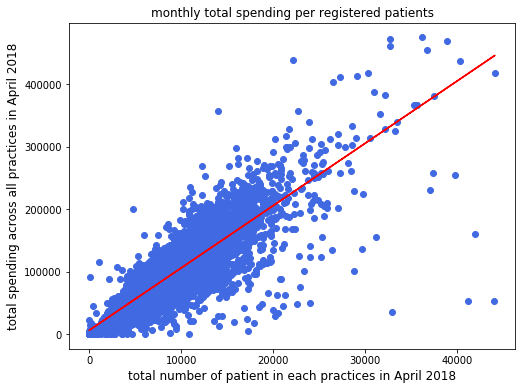

In [28]:
#visualize the monthly total spending per registered patients, trend line
max_ACT = PRACTICE_Table['ACT_COST'].quantile(.999) #identify the potential noise data(the largest 0.1%)
max_PAT = PRACTICE_Table['NUMBER_OF_PATIENTS'].quantile(.999) #identify the potential noise data(the largest 0.1%)
PRACTICE_Table_1 = PRACTICE_Table.loc[(PRACTICE_Table['NUMBER_OF_PATIENTS'] < max_PAT) & (PRACTICE_Table['ACT_COST'] < max_ACT)]
fig = plt.figure(figsize = (8, 6)) #the size of background
PRACTICE_scatterplot = fig.add_subplot(111)
y = PRACTICE_Table_1['ACT_COST'] # the value of x axis
x = PRACTICE_Table_1['NUMBER_OF_PATIENTS'] # the value of y axis
PRACTICE_scatterplot.scatter(x, y, color='royalblue')
fit = np.polyfit(x, y, deg = 1) # the scatterplot
PRACTICE_scatterplot.plot(x, fit[0] * x + fit[1], color='red') # the trend line
PRACTICE_scatterplot.set_title ('monthly total spending per registered patients')
PRACTICE_scatterplot.set_ylabel('total spending across all practices in April 2018',fontsize=12)
PRACTICE_scatterplot.set_xlabel('total number of patient in each practices in April 2018',fontsize=12)

#### But we could also find in the histogram of the number of patients per practices, the distribution of the histogram is not normally distributed which is mean that the distribution of patients is uneven. This situation could result in some practices are very busy, and at the same time, another one is free.

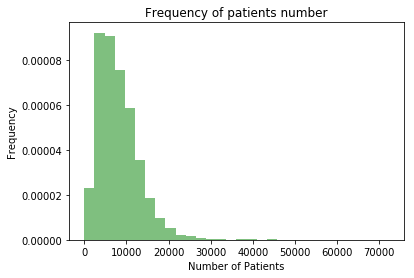

In [29]:
n, bins, patches = plt.hist(PRACTICE_Table.NUMBER_OF_PATIENTS, 30, density = 1, facecolor = 'green', alpha = 0.5)
plt.title('Frequency of patients number')
plt.xlabel("Number of Patients")
plt.ylabel("Frequency") 
plt.show() #histogram of patients number

#### The histogram for relative spending for all practices also needs data cleaning. For this histogram, we use the variable ‘Relative_Costs_Per_Patient' and delete the bottom 1% and the top 1% of the value to avoid the influence of outliers. We also fit a Gaussian curve to support us to judge the distribution. From the diagram, we can conclude that the distribution of relative costs per patient is approximating a normal distribution.

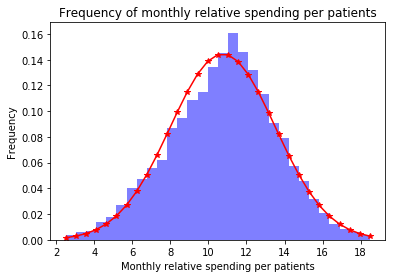

In [30]:
#histogram about relative spending for all practices, Gaussian curve
x = PRACTICE_Table.Relative_Costs_Per_Patient.values
min_x = PRACTICE_Table['Relative_Costs_Per_Patient'].quantile(.01) #identify the potential noise data(the bottom 1%)
max_x = PRACTICE_Table['Relative_Costs_Per_Patient'].quantile(.99) #identify the potential noise data(the top 1%)
x_1 = [i for i in x if (i < max_x) & (i> min_x)] # exclude the noise data
num_bins = 30 #identify the number of bins
n, bins, patches = plt.hist(x_1, num_bins, density = 1, facecolor = 'blue', alpha = 0.5) #histogram for relative spending for all practices
mean =np.mean(x_1)
std =np.std(x_1)
y = stats.norm.pdf(bins, mean, std) #fit the Gaussian curve
plt.plot(bins, y, 'r-*')
plt.title('Frequency of monthly relative spending per patients')
plt.xlabel("Monthly relative spending per patients")
plt.ylabel("Frequency")
plt.show()

#### Further test, we use the function ‘scipy.stats.normaltest’ to test whether a sample differs from a normal distribution. The null hypothesis of this test is the sample comes from a normal distribution. We receive the return P-value is less than 0.01, so we can reject the null hypothesis, and this is mean that the distribution of spending per practices is not a normal distribution. The diagram seems like negative skewness which means the average is less than the median, and the median is less than the mode.

In [31]:
stats.normaltest (x, axis=0) #normal distribution test

NormaltestResult(statistic=24361.584421525054, pvalue=0.0)

<font color=Blue size=10 > Assignment_B_1 </font>

#### The data sources used in Assignment B is the WHO Mortality (ICD-10 version) and Population datasets. It is a database of registered deaths compiled by WHO from data given by national authorities around the world. The cause of each death is classified by the circumstances that led to death. We will use the Mortality data, country codes and Population and live births datasets. The ‘Mortality data' including the variables country code, year, sex, death cause code (ICD-10) and death age. Another file which called ‘Documentation_1 Dec2018’ including the explanation of ICD-10 code so we could identify the target cause based on the variable ‘Cause’.

In [32]:
#use Morticd10.CSV as data4
data4_1 = pd.read_csv('/Users/Liujianyu/Desktop/DMHR/Final_assignment/Morticd10_part1.csv', index_col=False,low_memory=False)
data4_2 = pd.read_csv('/Users/Liujianyu/Desktop/DMHR/Final_assignment/Morticd10_part2.csv', index_col=False,low_memory=False)
data4_3 = pd.concat([data4_1,data4_2])
data4 = data4_3.loc[data4_3['Year'] == 2010]
data4.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
995,1400,NaN,NaN,2010,101,1000,1,7,1,363,...,108.0,NaN,NaN,NaN,NaN,0.0,2.0,3.0,3.0,4.0
996,1400,NaN,NaN,2010,101,1000,2,7,1,301,...,169.0,NaN,NaN,NaN,NaN,0.0,2.0,6.0,1.0,0.0
997,1400,NaN,NaN,2010,101,1001,1,7,1,23,...,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
998,1400,NaN,NaN,2010,101,1001,2,7,1,29,...,19.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
999,1400,NaN,NaN,2010,101,1002,1,7,1,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


#### Through the file of country code, we could identify the country code of Iceland, Italy and New Zealand are 4160, 4180 and 5150, We need to focus on mortality data at the year of 2010, and we could get the total number of deaths of these three countries. The deaths number in Iceland in 2010 is 4038, in Italy is 1169230 and in New Zealand is 57298.

In [33]:
#summarize the total number of deaths in Iceland, Italy and New Zealand in 2010
iceland_death = data4.loc[data4['Country'] == 4160].Deaths1.sum()
Italy_death = data4.loc[data4['Country'] == 4180].Deaths1.sum()
New_Zealand_death = data4.loc[data4['Country'] == 5150].Deaths1.sum()
iceland_death,Italy_death,New_Zealand_death

(4038, 1169230, 57298)

#### Similarly, we could extract the data of population from ‘Population_and_live_births.CSV'. Based on country code and year, we could identify the population of those three countries. The population in Iceland, Italy and New Zealand in 2010 is 318041, 60483386 and 4367360.

In [34]:
#use Population_and_live_births.CSV as data5
data5= pd.read_csv('/Users/Liujianyu/Desktop/DMHR/Final_assignment/pop.csv' , index_col=False,low_memory=False)
data6 = data5.loc[data5['Year'] == 2010]
data6.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
86,1125,NaN,NaN,2010,1,4,40250440.0,1219070.0,3063246.0,NaN,...,971087.0,692772.0,434889.0,407699.0,NaN,NaN,NaN,NaN,0.0,1219070.0
87,1125,NaN,NaN,2010,2,4,38477889.0,1163338.0,2908480.0,NaN,...,871006.0,597495.0,418810.0,391919.0,NaN,NaN,NaN,NaN,0.0,1163338.0
212,1300,NaN,NaN,2010,1,1,612981.0,7265.0,7453.0,7877.0,...,22906.0,14357.0,10138.0,6397.0,4023.0,2088.0,NaN,NaN,0.0,7208.0
213,1300,NaN,NaN,2010,2,1,630103.0,7137.0,7460.0,7779.0,...,26101.0,17808.0,13826.0,9703.0,6886.0,4880.0,NaN,NaN,0.0,7083.0
240,1365,NaN,NaN,2010,1,1,18711.0,372.0,404.0,399.0,...,544.0,482.0,359.0,213.0,97.0,62.0,NaN,NaN,0.0,359.0


In [35]:
#summarize the population in Iceland, Italy and New Zealand in 2010
iceland_pop = data6.loc[data6['Country'] == 4160].Pop1.sum()
Italy_pop = data6.loc[data6['Country'] == 4180].Pop1.sum()
New_Zealand_pop = data6.loc[data6['Country'] == 5150].Pop1.sum()
iceland_pop,Italy_pop,New_Zealand_pop

(318041.0, 60483386.0, 4367360.0)

#### The population and mortality in these three countries differ significantly. We could calculate the mortality rate by using death number in 2010 divided by the population in 2010. The mortality rate in Italy is considerably higher than the other two countries, and the rate is 19.3 in a population of 1000. This rate is much higher than the result provided by The World Factbook (10.4 in a population of 1000) which is supported by the Central Intelligence Agency. This problem may be due to the noisy data and different data collection rules, but we could not identify the reason based on the available data.

In [36]:
round(iceland_death/iceland_pop,4), round(Italy_death/Italy_pop,4), round(New_Zealand_death/New_Zealand_pop,4)

(0.0127, 0.0193, 0.0131)

<font color=Blue size=10 > Assignment_B_2 </font>

#### By summarize the death number of the different age group in Italy, we could visualize the distribution of deaths. From the diagram, we could find the most proportion of the people deaths at age 80 to 84 and 85 to 90. The average life expectancy in Italy provided by World Bank is 82.54 in 2016, and the peak of deaths frequency is just over this expectancy. We could also find the deaths frequency at 0 is significantly higher than several groups after it. This result is mean that children age under one year old is also an essential stage of people’s healthy and people ought to pay more attention to the health of new-born.

In [37]:
#list of the distribution of deaths by age group in Italy
Italy_death_all = data4_3.loc[data4_3['Country'] == 4180].sum()
Italy_death_all_list = Italy_death_all.tolist()
histogram_Italy = Italy_death_all_list[10:34]
histogram_Italy[0:5]

[48752.0, 3262.0, 2168.0, 1826.0, 1628.0]

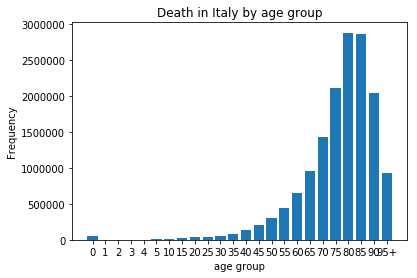

In [38]:
#histogram of the distribution of deaths by age group in Italy
label1 = ['0','1','2','3','4','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','95+']
plt.bar(label1, histogram_Italy)
plt.title('Death in Italy by age group')
plt.xlabel("age group")
plt.ylabel("Frequency")
plt.show()

<font color=Blue size=10 > Assignment_B_3 </font>

#### For the variable ‘Cause', we could find that there are three different kinds of data type. Some of them are recorded in one letter followed by three numbers, some of them are recorded in one letter followed by two numbers, and the rest is recorded by four digits number. Through ‘Documentation 1 Dec2018', we could find the type of 4 digits number is a potential noisy data because it could be ICD-9 code or code in ICD 10 Mortality Tabulation List 1. For example, 1026 could mean 102.6, and it is an ICD-9 code which means ‘Bone and joint lesions due to yaws’. But it could also be a code in ICD 10 Mortality Tabulation List 1 which replace C00-D48. This data type makes people feel confusing so we could not judge this type of data. For another two types of data, they are all ICD-10 code in different levels of detail.

In [39]:
#calculate the position of C00 to D48 in the ICD-10 list
data4_4 = data4_3.loc[data4_3['Country'] == 4180]
list_B1 = data4_4['Cause'].tolist() #identify all the cause
list_B2 = list(set(list_B1))
list_B2.sort()
list_B2.index('C000'),list_B2.index('D489')

(320, 939)

#### In our data source, we could find 620 kind of codes between C00 and D48 which is relative with a neoplasm (from C00.0 to D48.9). Based on this code, we could extract all the samples relative with neoplasm, and we could calculate the proportion of each deaths cause. The top5 cause is shown in the table, and we could check in the WHO website to identify the meaning of each code. The majority type of neoplasm result in death in Italy is C34.9 which means ‘Malignant neoplasm of unspecified part of bronchus or lung', and the proportion of this type is 19.0% which is much higher than the second highest reason (only 6.9%). This phenomenon indicates that neoplasm of bronchus or lung is a majority reason for people's health problems. Furthermore, the danger of smoking should further attract people's attention.

In [40]:
#identify the top 5 causes of death in Italy across all years for the Neoplasm
list_Neoplasm = list_B2[320:940]
list_B3 = data4_4.Cause.isin(list_Neoplasm)
data4_5 = data4_4.copy()
data4_5['JUDGE'] = list_B3 #identify the cause belong to Neoplasm ICD10-category
data4_6 = data4_5.loc[data4_5['JUDGE'] == 1]
Neoplasm_Cause = data4_6.groupby(['Cause']).sum()
Neoplasm_Cause_1 = Neoplasm_Cause.sort_values(by='Deaths1', ascending=False)
Italy_Neoplasm = pd.DataFrame(Neoplasm_Cause_1['Deaths1'])
Italy_Neoplasm['Proportion (%)'] = round(Neoplasm_Cause_1['Deaths1'] *100/ Neoplasm_Cause_1['Deaths1'].sum(),1) #calculate the proportion of overall deaths
Italy_Neoplasm.head(5)

,Deaths1,Proportion (%)
Cause,,
C349,426451,19.0
C509,155895,6.9
C189,143188,6.4
C169,125679,5.6
C259,120070,5.3


#### In the pie chart, we combined the reasons other than the top five to highlight these five reasons. The top 5 causes of death relative with neoplasm are malignant neoplasm of unspecified part of bronchus or lung, malignant neoplasm of breast of unspecified site, malignant neoplasm of colon unspecified, Malignant neoplasm of stomach unspecified and malignant neoplasm of pancreas unspecified. We could also find all of these five reasons are unspecified and we need to pay attention to the difficulty of diagnosis neoplasm type.

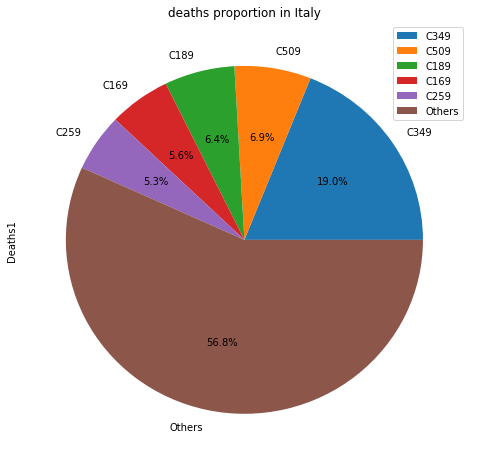

In [41]:
#a pie chart of the deaths proportion
Italy_Neoplasm_1 = Italy_Neoplasm[0:5]
Others_list = {'Deaths1':[1277378],'Proportion':[0.568061]} #summarize other reason of deaths other than top 5 reason
Others = pd.DataFrame(Others_list,index=['Others']) 
Italy_Neoplasm_Pie = pd.concat([Italy_Neoplasm_1,Others],sort = True) #Cobine other reason of deaths other than top 5 reason
plot = Italy_Neoplasm_Pie.plot.pie(y='Deaths1', figsize=(8, 8),autopct='%1.1f%%',title = 'deaths proportion in Italy')

<font color=Blue size=10 > Assignment_B_4 </font>

#### The top 5 age group in Australia dying with neoplasms cause of death could be identified by summarizing the death number in Australia of each age group. We could find except age group from 85 to 89, the number of deaths with neoplasms increases with age growth.

In [42]:
#the top five age groups in Australia dying with a Neoplasms cause of death in 2010
Australia_death_2010 = data4.loc[data4['Country'] == 5020]
list_B4 = Australia_death_2010.Cause.isin(list_Neoplasm) #identify the people death because of Neoplasm
Australia_death_2010_1 = Australia_death_2010.copy()
Australia_death_2010_1['JUDGE'] = list_B4
Australia_death_2010_2 = Australia_death_2010_1.loc[Australia_death_2010_1['JUDGE'] == 1].sum()[10:35]#only keep the summarization result about number of death
Australia_death_2010_3 = pd.DataFrame(Australia_death_2010_2,columns = ['Death_Neoplasms'])
Australia_death_2010_3['Death_All_Cause'] = Australia_death_2010_1.sum()[10:35]
Australia_death_2010_3['Proportion (%)'] = Australia_death_2010_3.Death_Neoplasms*100 /Australia_death_2010_3.Death_All_Cause
Australia_death_2010_sort1 = Australia_death_2010_3.sort_values(by='Death_Neoplasms', ascending=False).head(5)
Australia_death_2010_sort1

,Death_Neoplasms,Death_All_Cause,Proportion (%)
Deaths22,7167,48548,14.7627
Deaths21,6291,32744,19.2127
Deaths20,5713,24754,23.0791
Deaths23,5520,53574,10.3035
Deaths19,4768,18718,25.4728


#### But when we focus on the proportion of dying with neoplasms cause of death in all the deaths people in each age group, we have a different finding. The top5 percentage is people from 60 to 64, and the proportion is 26%. This result is mean that 26% of people die in there 60 to 64 is because of neoplasms. And the top5 group is from 50 to 75, and this group could be identified as a high incidence of neoplasms in Australia. So it is clear that there have differences by age group for deaths from Neoplasms in Australia for 2010.

In [43]:
#the proportion of dying with neoplasms cause of death in all the deaths people 
Australia_death_2010_sort2 = Australia_death_2010_3.sort_values(by='Proportion (%)', ascending=False).head(5)
Australia_death_2010_sort2

,Death_Neoplasms,Death_All_Cause,Proportion (%)
Deaths18,3938,15160,25.9763
Deaths19,4768,18718,25.4728
Deaths17,2695,10920,24.6795
Deaths20,5713,24754,23.0791
Deaths16,1756,8156,21.5302


<font color=Blue size=10 > Assignment_B_5 </font>

#### To compare and contrast the frequency of deaths by Neoplasms in Italy and Australia in 2010, we could summarize the deaths and population information in 2 different logic. First, we can combine information from different type of Neoplasms. Based on this logic, we could compare the majority type of Neoplasms in these two countries. From ‘Neo/Death%’, we could calculate the proportion of deaths from each type of Neoplasms to the total deaths of Neoplasms. We could find the most frequency Neoplasms in both countries is C349, which means ‘Malignant neoplasm of unspecified part of bronchus or lung’. But the frequency of C61, Malignant neoplasm of prostate, in Australia is much higher than Italy. From ‘Neo/pop%’, we could calculate the proportion of deaths from Neoplasms to the total population. The order of this variable is similar to ‘Neo/Death%’.

In [44]:
#The frequency of deaths by Neoplasms in Italy and Australia by different neoplasms type
data4_Aus = data4_3.loc[data4_3['Country'] == 5020]
list_Aus_1 = data4_Aus['Cause'].tolist() #identify all the cause
list_Aus_2 = data4_Aus.Cause.isin(list_Neoplasm)
data4_Aus_1 = data4_Aus.copy()
data4_Aus_1['JUDGE'] = list_Aus_2 #identify the cause belong to Neoplasm ICD10-category
data4_Aus_2 = data4_Aus_1.loc[data4_Aus_1['JUDGE'] == 1]
Neoplasm_Cause_Aus = data4_Aus_2.groupby(['Cause']).sum()
Neoplasm_Cause_Aus_1 = Neoplasm_Cause_Aus.sort_values(by='Deaths1', ascending=False)
Aus_Neoplasm = pd.DataFrame(Neoplasm_Cause_Aus_1['Deaths1'])
Aus_Neoplasm['Proportion (%)'] = round(Neoplasm_Cause_Aus_1['Deaths1'] *100/ Neoplasm_Cause_Aus_1['Deaths1'].sum(),1) #calculate the proportion of overall deaths
Aus_Neoplasm_1 = Aus_Neoplasm.reset_index()
Aus_Neoplasm_1['Population%'] = round (Aus_Neoplasm_1.Deaths1*100/data6.loc[data6['Country'] == 5020].Pop1.sum(),2)
Italy_Neoplasm_1 = Italy_Neoplasm.reset_index()
Italy_Neoplasm_1['Population%'] = round (Italy_Neoplasm_1.Deaths1*100/data6.loc[data6['Country'] == 4180].Pop1.sum(),2)
merge_Neoplasm = Aus_Neoplasm_1.merge(Italy_Neoplasm_1, on = 'Cause',how = 'outer')
merge_Neoplasm.columns = ['Cause','Deaths_Aus','Neo/Death_Aus%','Neo/pop_Aus%','Deahts_Ita','Neo/Death_Ita%','Neo/pop_Ita%']
merge_Neoplasm.sort_values(by='Neo/Death_Aus%', ascending=False).head(10)
#Pro_Aus_deaths% = number of people death from each type of Neoplasms / total number of people death from Neoplasms
#Pro_Aus_pop%= number of people death from each type of Neoplasms / total population

,Cause,Deaths_Aus,Neo/Death_Aus%,Neo/pop_Aus%,Deahts_Ita,Neo/Death_Ita%,Neo/pop_Ita%
0,C349,122554.0,17.8,0.55,426451,19.0,0.71
1,C61,49963.0,7.3,0.22,95906,4.3,0.16
2,C509,46064.0,6.7,0.21,155895,6.9,0.26
3,C259,34643.0,5.0,0.16,120070,5.3,0.20
4,C189,33282.0,4.8,0.15,143188,6.4,0.24
5,C80,23427.0,3.4,0.11,33186,1.5,0.05
6,C439,19987.0,2.9,0.09,17279,0.8,0.03
7,C159,18809.0,2.7,0.08,22888,1.0,0.04
8,C169,17640.0,2.6,0.08,125679,5.6,0.21
10,C719,15514.0,2.3,0.07,18906,0.8,0.03


#### Second, we can combine information from different age group. Based on this logic, we could compare the mortality from Neoplasms in each age group. 

In [45]:
#The frequency of deaths by Neoplasms in Italy and Australia by age group
Italy_death_2010 = data4.loc[data4['Country'] == 4180]
list_B5 = Italy_death_2010.Cause.isin(list_Neoplasm) #identify the people death because of Neoplasm
Italy_death_2010_1 = Italy_death_2010.copy()
Italy_death_2010_1['JUDGE'] = list_B5
Italy_death_2010_2 = Italy_death_2010_1.loc[Italy_death_2010_1['JUDGE'] == 1].sum()[10:35]#only keep the summarization result about number of death
Italy_death_2010_3 = pd.DataFrame(Italy_death_2010_2,columns = ['Death_Neoplasms'])
Italy_death_2010_3['Death_All_Cause'] = Italy_death_2010_1.sum()[10:35]
Italy_death_2010_3['Proportion (%)'] = Italy_death_2010_3.Death_Neoplasms*100 /Italy_death_2010_3.Death_All_Cause
list_age_group = ['0','1','2','3','4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95+','unspecified']
Italy_death_2010_3.index = list_age_group
Italy_death_2010_4 = Italy_death_2010_3.reset_index()
Australia_death_2010_3.index = list_age_group
Australia_death_2010_4 = Australia_death_2010_3.reset_index()
Pop_Agegroup_Italy = pd.DataFrame(data6.loc[data6['Country'] == 4180].sum()[7:32],columns = ['Pop_Italy'])
Pop_Agegroup_Italy.index = list_age_group
Pop_Agegroup_Italy_1 = Pop_Agegroup_Italy.reset_index()
Pop_Agegroup_Aus = pd.DataFrame(data6.loc[data6['Country'] == 5020].sum()[7:32],columns = ['Pop_Aus'])
Pop_Agegroup_Aus.index = list_age_group
Pop_Agegroup_Aus_1 = Pop_Agegroup_Aus.reset_index()
merge_Italy = pd.merge(Italy_death_2010_4,Pop_Agegroup_Italy_1, on = 'index')[0:24]
merge_Italy['Popo_Pro_Italy%'] = merge_Italy.Death_Neoplasms*100 / merge_Italy.Pop_Italy
merge_Italy['Popo_Pro_Italy%'] = merge_Italy['Popo_Pro_Italy%'].astype(float)
merge_Italy['Popo_Pro_Italy%'] = round (merge_Italy['Popo_Pro_Italy%'],4)
merge_Aus = pd.merge(Australia_death_2010_4,Pop_Agegroup_Aus_1, on = 'index')[0:24]
merge_Aus['Popo_Pro_Aus%'] = merge_Aus.Death_Neoplasms*100 / merge_Aus.Pop_Aus
merge_Aus['Popo_Pro_Aus%'] = merge_Aus['Popo_Pro_Aus%'].astype(float)
merge_Aus['Popo_Pro_Aus%'] = round (merge_Aus['Popo_Pro_Aus%'],4)
merge_Age_group = pd.merge(merge_Italy,merge_Aus, on = 'index')
merge_Age_group.columns = ['age_group','Neoplasms_Ita','death_Ita','Neo/Death_Ita%','Pop_Ita','Neo/pop_Ita%','Neoplasms_Aus','death_Aus','Neo/Death_Aus%','Pop_Aus','Neo/pop_Aus%']
merge_Age_group_sort1 = merge_Age_group.sort_values(by='Neo/Death_Ita%', ascending=False).head(10)
merge_Age_group_sort1
#Pro_Death_Ita% = number of people death from Neoplasms in this age group / total number of people death in this age group
#Pro_pop_Ita% = number of people death from Neoplasms in this age group / total number of population in this age group

,age_group,Neoplasms_Ita,death_Ita,Neo/Death_Ita%,Pop_Ita,Neo/pop_Ita%,Neoplasms_Aus,death_Aus,Neo/Death_Aus%,Pop_Aus,Neo/pop_Aus%
16,60-64,14049,51232,27.4223,3757507.0,0.3739,3938,15160,25.9763,1211191.0,0.3251
15,55-59,8553,31796,26.8996,3716030.0,0.2302,2695,10920,24.6795,1325205.0,0.2034
17,65-69,17890,67594,26.4668,3107714.0,0.5757,4768,18718,25.4728,908177.0,0.5250
14,50-54,5685,22282,25.5139,4095185.0,0.1388,1756,8156,21.5302,1467896.0,0.1196
18,70-74,25258,107624,23.4687,3068744.0,0.8231,5713,24754,23.0791,710052.0,0.8046
13,45-49,3437,15886,21.6354,4717717.0,0.0729,1064,5914,17.9912,1575858.0,0.0675
5,5-9,90,456,19.7368,2838221.0,0.0032,46,282,16.3121,1365354.0,0.0034
12,40-44,1925,10182,18.9059,4949158.0,0.0389,548,3886,14.1019,1549610.0,0.0354
19,75-79,29884,158356,18.8714,2531923.0,1.1803,6291,32744,19.2127,553062.0,1.1375
6,10-14,97,584,16.6096,2811810.0,0.0034,31,280,11.0714,1403828.0,0.0022


#### From the variable ‘Neo/Death%’, we could find Neoplasms is a majority cause of death at 5 to 9 and 60 to 64 years old in these two countries. Compare with Italy, Australia has better control of Neoplasms before 75 years old.

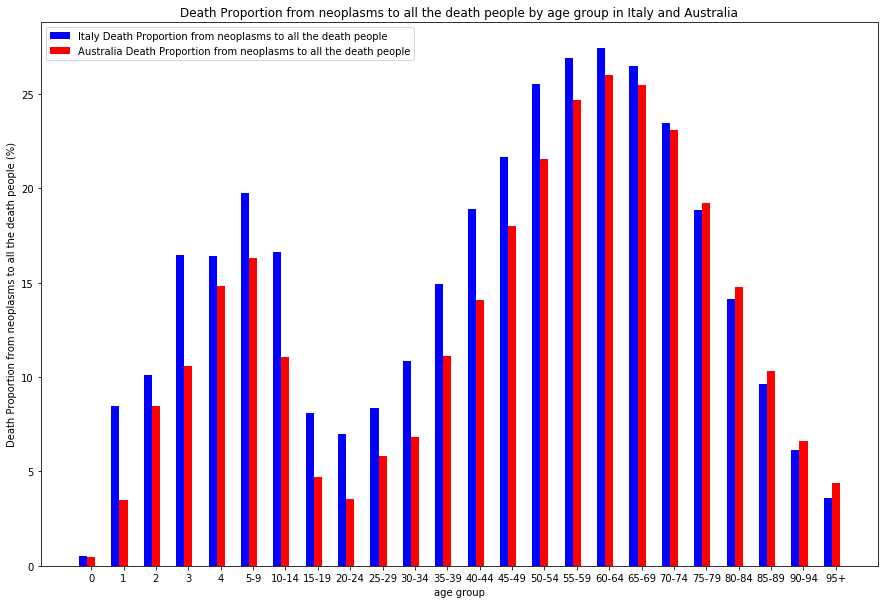

In [46]:
#histogram about Death Proportion from neoplasms to all the death people by age group in Italy and Australia based on the above table
age_group_list = merge_Age_group.age_group
Pro_Death_Ita_list = merge_Age_group['Neo/Death_Ita%']
Pro_Death_Aus_list = merge_Age_group['Neo/Death_Aus%']
x = list(range(len(age_group_list)))
total_width, n = 1, 4
width = total_width / n
fig = plt.figure(figsize = (15, 10))
plt.bar(x, Pro_Death_Ita_list, width=width, label='Italy Death Proportion from neoplasms to all the death people',fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width #identify the position of second bar
plt.bar(x, Pro_Death_Aus_list, width=width, label='Australia Death Proportion from neoplasms to all the death people',tick_label = age_group_list,fc = 'r')
plt.title('Death Proportion from neoplasms to all the death people by age group in Italy and Australia')
plt.xlabel("age group")
plt.ylabel("Death Proportion from neoplasms to all the death people (%)")
plt.legend()
plt.show()

#### From the variable ‘Neo/pop%’, we could find the proportion of people deaths from Neoplasms to each age group’s population continuous increase. The older the person, the more risk of Neoplasms should be prevented.

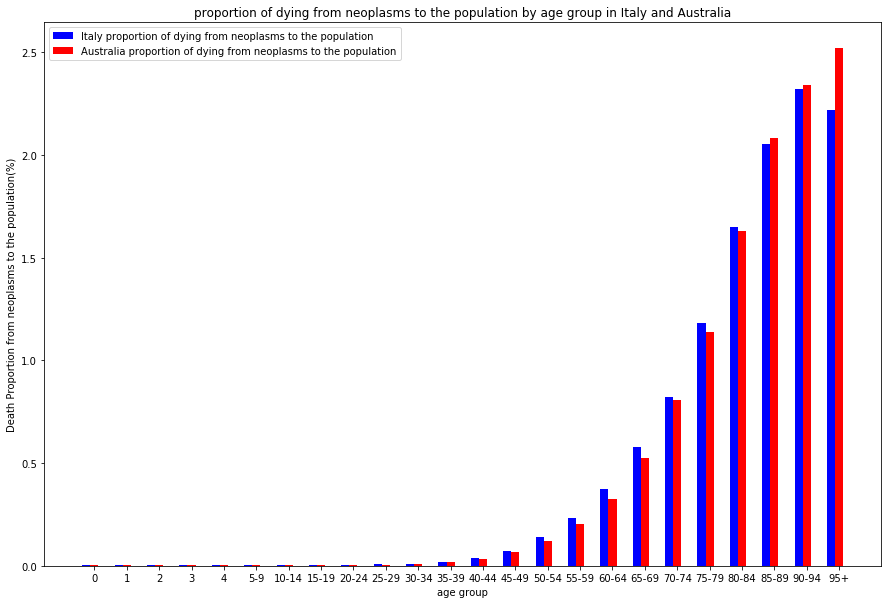

In [47]:
#histogram about proportion of dying from neoplasms to the population by age group in Italy and Australia based on the above table
age_group_list = merge_Age_group.age_group
Pro_pop_Ita_list = merge_Age_group['Neo/pop_Ita%']
Pro_pop_Aus_list = merge_Age_group['Neo/pop_Aus%'] #value of each bars
x = list(range(len(age_group_list)))
total_width, n = 1, 4
width = total_width / n
fig = plt.figure(figsize = (15, 10))
plt.bar(x, Pro_pop_Ita_list, width=width, label='Italy proportion of dying from neoplasms to the population',fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width #identify the position of second bar
plt.bar(x, Pro_pop_Aus_list, width=width, label='Australia proportion of dying from neoplasms to the population',tick_label = age_group_list,fc = 'r')
plt.title('proportion of dying from neoplasms to the population by age group in Italy and Australia')
plt.xlabel("age group")
plt.ylabel("Death Proportion from neoplasms to the population(%)")
plt.legend()
plt.show()

##### REFERENCES

Is Metformin the World's Next Wonder Drug? Can It Block Cancer Cell Growth? (2017, June 8). Retrieved January 20, 2019. Available at: http://trendintech.com/2017/06/07/is-metformin-the-worlds-next-wonder-drug/ [Accessed 21, January 2019].

Wingo, P.A. et al., 2003. Long‐term trends in cancer mortality in the United States, 1930–1998. Cancer, 97(S12), pp.3133–3275.
